## 4. Interpretasi cluster yang dihasilkan secara bisnis dan berikan<br>rekomendasi yang sesuai dengan cluster yang dihasilkan<br>(30 poin)

<br>Langkah-langkah:
<br>a. Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik
ﬁtur dari setiap cluster
<br>b. Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing
cluster
<br>c. Berdasarkan cluster tersebut, berikan 1-2 rekomendasi bisnis


<br>Untuk mempermudah kamu, yuk lihat resource di bawah ini:
- Topic Unsupervised Learning - Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#k means dan elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
data_std = pd.read_csv(r'D:\Rakamin_UnsupervisedLearning\Homework\flight_Versi3_Mateng.csv')

In [3]:
data = pd.read_csv(r'D:\Rakamin_UnsupervisedLearning\Homework\flight_Versi3_NoOutlier.csv')

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_std)

In [5]:
df_data_std = pd.DataFrame(data=data_std, columns=list(data))

In [6]:
df_data_std['clusters'] = kmeans.labels_
data['clusters'] = kmeans.labels_

In [7]:
data.head(3)

,SUM_YR_1_Log_Z,LAST_TO_END_Log_Z,AVG_INTERVAL_Log_Z,clusters
0,1.742657,2.516008,2.107485,0
1,1.620897,1.293592,1.788565,1
2,1.512019,0.139160,0.360523,1


<Axes: >

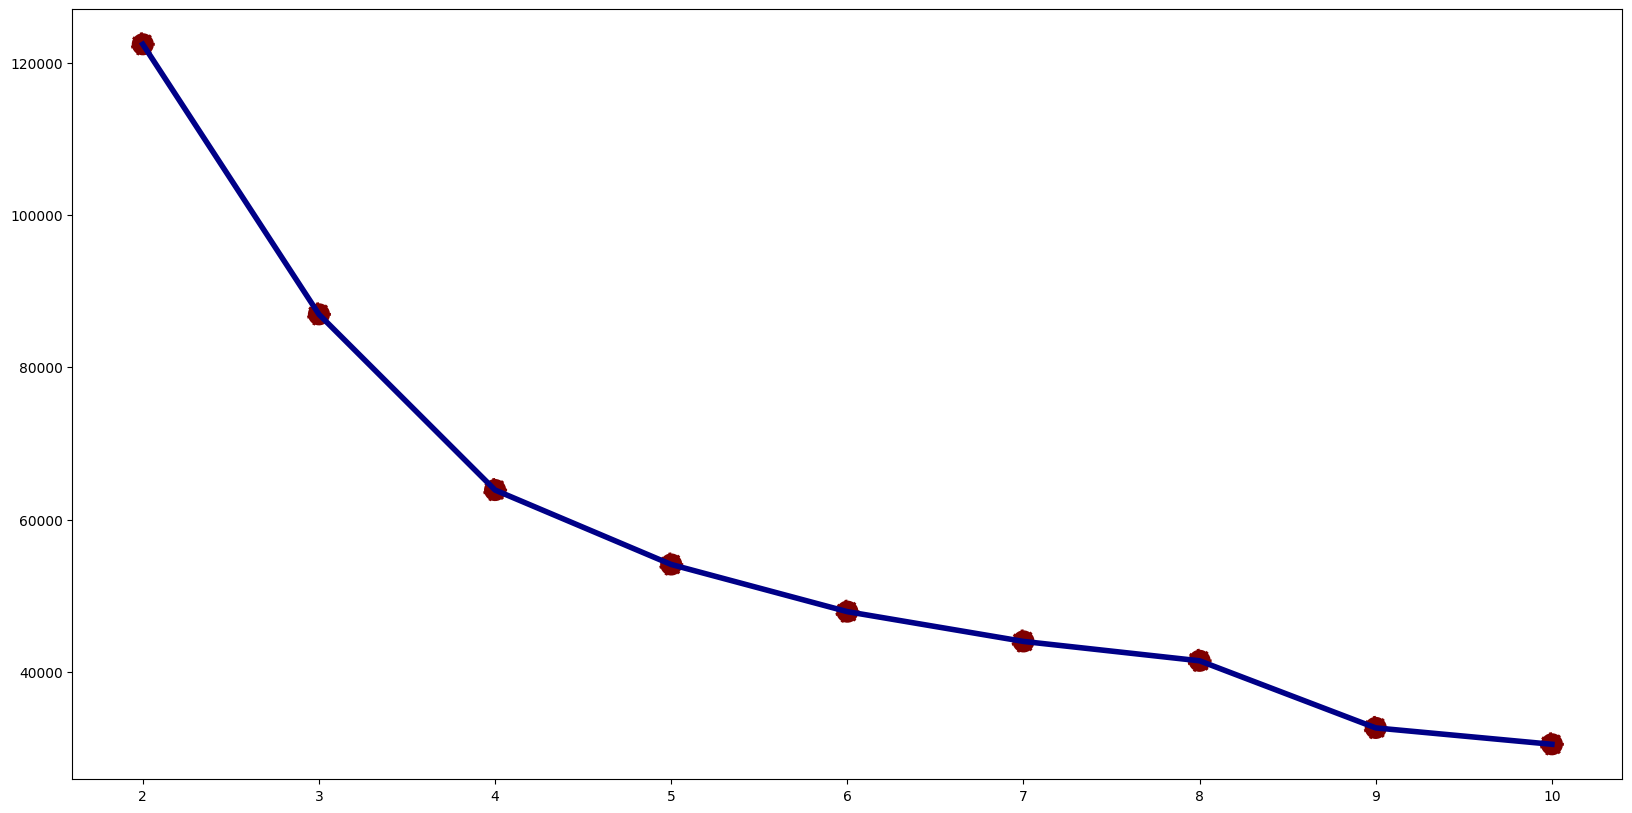

In [8]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


In [9]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


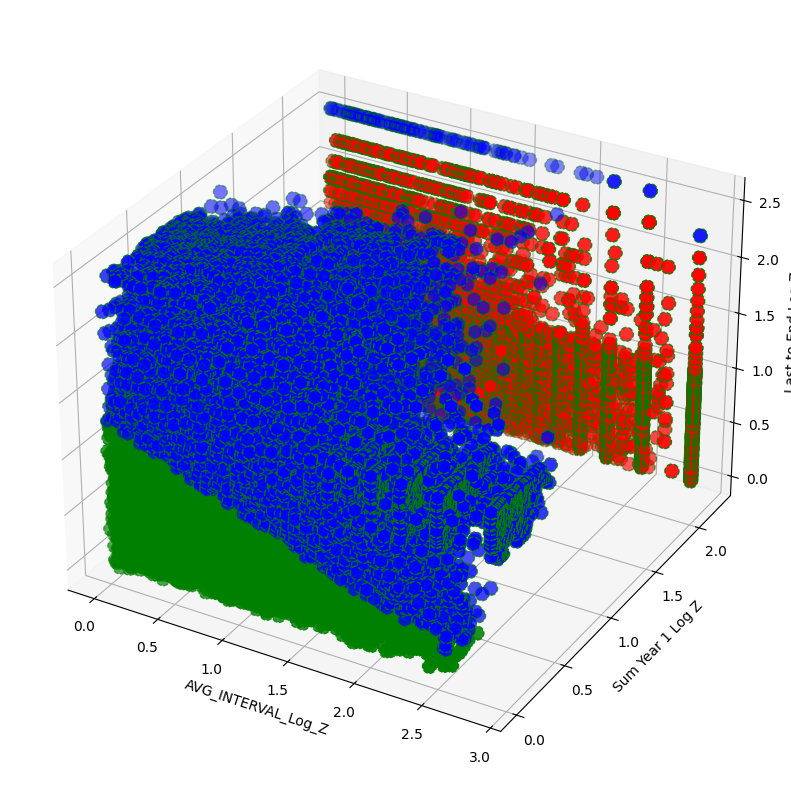

In [10]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['AVG_INTERVAL_Log_Z'][data.clusters == 0], 
           data['SUM_YR_1_Log_Z'][data.clusters == 0], 
           data['LAST_TO_END_Log_Z'][data.clusters == 0], 
           c='blue', s=100, edgecolor='green', linestyle='--')
ax.scatter(data['AVG_INTERVAL_Log_Z'][data.clusters == 1], 
           data['SUM_YR_1_Log_Z'][data.clusters == 1], 
           data['LAST_TO_END_Log_Z'][data.clusters == 1], 
           c='red', s=100, edgecolor='green', linestyle='--')
ax.scatter(data['AVG_INTERVAL_Log_Z'][data.clusters == 2], 
           data['SUM_YR_1_Log_Z'][data.clusters == 2], 
           data['LAST_TO_END_Log_Z'][data.clusters == 2], 
           c='green', s=100, edgecolor='green', linestyle='--')

plt.xlabel("AVG_INTERVAL_Log_Z")
plt.ylabel("Sum Year 1 Log Z")
ax.set_zlabel('Last to End Log Z')
plt.show()

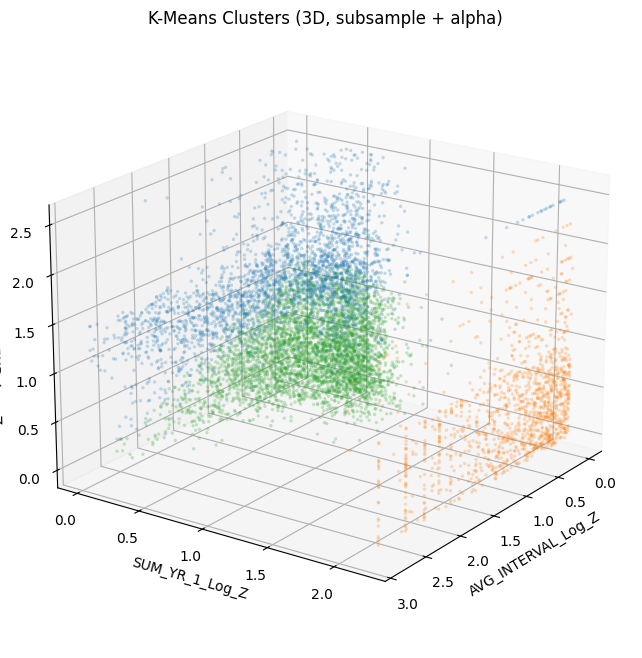

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# === 1) subsample biar ringan ===
np.random.seed(0)
show = min(len(data), 8000)   # tampilkan 8k titik saja
idx = np.random.choice(data.index, size=show, replace=False)
d = data.loc[idx]

# === 2) plot 3D dengan marker kecil & transparansi ===
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for c in sorted(d['clusters'].unique()):
    m = d['clusters'] == c
    ax.scatter(
        d.loc[m, 'AVG_INTERVAL_Log_Z'],
        d.loc[m, 'SUM_YR_1_Log_Z'],
        d.loc[m, 'LAST_TO_END_Log_Z'],
        s=6, alpha=0.25, linewidths=0  # kuncinya di sini
    )

ax.set_xlabel('AVG_INTERVAL_Log_Z')
ax.set_ylabel('SUM_YR_1_Log_Z')
ax.set_zlabel('LAST_TO_END_Log_Z')
ax.view_init(elev=20, azim=35)  # sudut pandang lebih “lapang”
plt.title('K-Means Clusters (3D, subsample + alpha)')
plt.show()


In [12]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,2.957163,2.302567,0
1,1.096324,2.004182,1
2,-1.668593,0.621440,1
3,1.846659,1.923645,0
4,-0.780229,1.804591,1


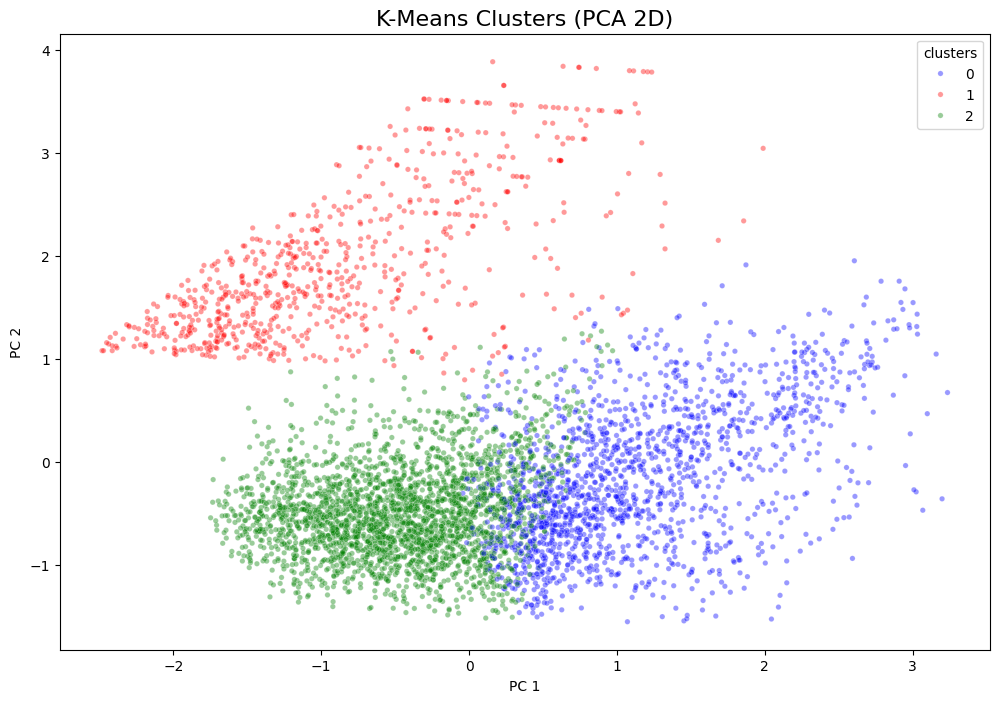

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    data=data_pca.sample(n=5000, random_state=42),  # subsample biar ringan
    palette=['blue','red','green'],
    s=15, alpha=0.4,   # marker kecil + transparan
    ax=ax
)

plt.title("K-Means Clusters (PCA 2D)", fontsize=16)
plt.show()
